# M2 Analisis Data Gym Membership

## URL Dashboard


**Dashboard Interaktif:** [Akses Dashboard Hasil Analisis Di Sini](https://public.tableau.com/shared/5CMNJYQ36?:display_count=n&:origin=viz_share_link)

## Import Libraries

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## SMART, Qey Question, and Problem Statmen

**Specific:** Menganalisis pola penggunaan layanan gym untuk meningkatkan kepuasan anggota dan pendapatan tambahan

**Measurable:** Mengidentifikasi layanan yang paling diminati, Menemukan segment anggota dengan engagement tertinggi

**Acivable:** Menganalisis penggunaan berbagai layanan gym, Mengidentifikasi pola kunjungan dan preferensi waktu

**Relevant:** Meningkatkan utilisasi fasilitas dan pendapatan, Pengalaman fitness yang lebih personal dan memuaskan

**Time-bound:** Analisis dalam 1 minggu untuk hasil yang dapat segera diimplementasikan


**Problem Statment:** Menganalisis data perilaku 1.000 anggota gym selama 1 minggu untuk mengidentifikasi pola penggunaan layanan, preferensi berdasarkan gender dan jenis keanggotaan, serta metrik kunjungan (frekuensi, durasi, jam/hari favorit). Hasil analisis ini akan digunakan untuk memberikan rekomendasi strategis yang terperinci guna mengoptimalkan fasilitas, layanan tambahan, dan meningkatkan kepuasan serta retensi anggota secara keseluruhan

**Qey Question:**
1. Apakah anggota Premium lebih sering menggunakan fasilitas premium?
2. Lihat bedanya pola workout cowok vs cewek berdaraskan group lesson?
3. Layanan tambahan mana yang paling disukai? (personal training vs group lesson vs sauna)
4. Cari tahu jam dan hari favorit member datang ke gym?
5. Berapa rata-rata frekuensi kunjungan dan lama di gym?
6. Perbandingan Kunjungan Berdasarkan Gender


## Data Loading

In [29]:
df = pd.read_csv("gym_membership.csv")

In [30]:
df.head()

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,116,False,NaN,False,NaN,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,48,False,NaN,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,123,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,99,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,50,False,NaN,True,Mike,False


In [ ]:
df.isnull().sum()

id                       0
gender                   0
Age                      0
abonoment_type           0
visit_per_week           0
days_per_week            0
attend_group_lesson      0
fav_group_lesson       497
avg_time_check_in        0
avg_time_in_gym          0
personal_training        0
uses_sauna               0
check_in_hour            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1000 non-null   int64 
 1   gender               1000 non-null   object
 2   Age                  1000 non-null   int64 
 3   abonoment_type       1000 non-null   object
 4   visit_per_week       1000 non-null   int64 
 5   days_per_week        1000 non-null   object
 6   attend_group_lesson  1000 non-null   bool  
 7   fav_group_lesson     503 non-null    object
 8   avg_time_check_in    1000 non-null   object
 9   avg_time_in_gym      1000 non-null   int64 
 10  personal_training    1000 non-null   bool  
 11  uses_sauna           1000 non-null   bool  
 12  check_in_hour        1000 non-null   int64 
dtypes: bool(3), int64(5), object(5)
memory usage: 81.2+ KB


In [31]:
df.sample()

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
415,416,Male,1988-01-12,36,Premium,3,"Sat, Sun, Wed",True,LesMiles,19:37:00,20:38:00,61,False,NaN,False,NaN,True


In [32]:
df.describe()

,id,Age,visit_per_week,avg_time_in_gym
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,30.604000,2.682000,105.260000
std,288.819436,10.817958,1.241941,43.557177
min,1.000000,12.000000,1.000000,30.000000
25%,250.750000,21.000000,2.000000,67.000000
50%,500.500000,30.000000,3.000000,104.000000
75%,750.250000,40.000000,3.000000,143.000000
max,1000.000000,49.000000,5.000000,180.000000


## Data Cleaning

In [ ]:
df.head()

,id,gender,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_in_gym,personal_training,uses_sauna,check_in_hour
0,1,Female,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,116,False,True,19
1,2,Female,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,48,True,False,19
2,3,Male,41,Premium,1,Sat,True,XCore,08:29:00,123,True,False,8
3,4,Male,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,99,True,True,9
4,5,Male,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,50,True,False,8


In [ ]:
# Hapus kolom yang tidak relevan
df = df.drop(columns=['birthday', 'drink_abo', 'fav_drink', 
                      'name_personal_trainer', 
                      'avg_time_check_out'])

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
# Supaya memory lebih ringan dan mudah dianalisis:
cat_cols = ['gender', 'abonoment_type', 'days_per_week']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Biar bisa dipakai untuk analisis pola jam kedatangan
df['avg_time_check_in'] = pd.to_datetime(df['avg_time_check_in'], format='%H:%M:%S').dt.time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1000 non-null   int64 
 1   gender               1000 non-null   object
 2   Age                  1000 non-null   int64 
 3   abonoment_type       1000 non-null   object
 4   visit_per_week       1000 non-null   int64 
 5   days_per_week        1000 non-null   object
 6   attend_group_lesson  1000 non-null   bool  
 7   fav_group_lesson     1000 non-null   object
 8   avg_time_check_in    1000 non-null   object
 9   avg_time_in_gym      1000 non-null   int64 
 10  personal_training    1000 non-null   bool  
 11  uses_sauna           1000 non-null   bool  
 12  check_in_hour        1000 non-null   int64 
dtypes: bool(3), int64(5), object(5)
memory usage: 81.2+ KB


In [ ]:
# Mengisi nilai yang hilang (NaN) di kolom 'fav_group_lesson'
df['fav_group_lesson'] = df['fav_group_lesson'].fillna('No Group Lesson')

In [ ]:
df.to_csv("gymm_membership_clean.csv", index=False)

## Analisis dan Perhitungan

### Nomor 1

H0 : Tidak ada hubungan signifikan antara jenis keanggotaan dan penggunaan personal training.

H1 : Ada hubungan signifikan antara jenis keanggotaan dan penggunaan personal training

In [ ]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df['abonoment_type'], df['personal_training'])

# Uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")


Chi-square Statistic: 1.984
P-value: 0.159


In [ ]:
# Hitung jumlah member Standard dan Premium untuk tiap layanan
service_counts = {
    'Personal Training': df.groupby('abonoment_type')['personal_training'].sum(),
    'Group Lesson': df.groupby('abonoment_type')['attend_group_lesson'].sum(),
    'Sauna': df.groupby('abonoment_type')['uses_sauna'].sum()
}

service_counts_df = pd.DataFrame(service_counts)

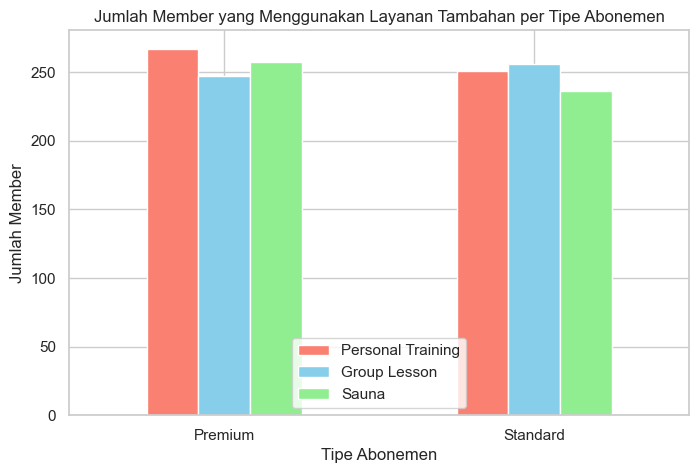

In [ ]:
service_counts_df.plot(kind='bar', figsize=(8,5), color=['salmon','skyblue','lightgreen'])
plt.title('Jumlah Member yang Menggunakan Layanan Tambahan per Tipe Abonemen')
plt.ylabel('Jumlah Member')
plt.xlabel('Tipe Abonemen')
plt.xticks(rotation=0)
plt.show()


Tidak ada hubungan yang signifikan antara jenis keanggotaan dan penggunaan layanan tambahan di gym. Artinya, pilihan layanan tambahan tidak bergantung pada jenis keanggotaan (premium atau standard).

### Nomor 2

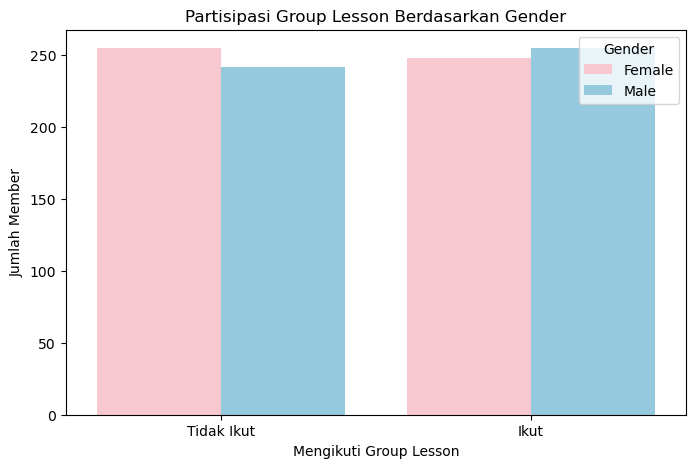

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='attend_group_lesson', hue='gender', data=df, palette=['pink','skyblue'])
plt.xticks([0,1], ['Tidak Ikut','Ikut'])
plt.title('Partisipasi Group Lesson Berdasarkan Gender')
plt.xlabel('Mengikuti Group Lesson')
plt.ylabel('Jumlah Member')
plt.legend(title='Gender')
plt.show()


**H0:** Tidak ada hubungan yang signifikan antara [attend_group_lesson] dan [gender]   

**H1:** Ada hubungan yang signifikan antara [attend_group_lesson] dan [gender]

In [ ]:
# Buat tabel kontingensi
contingency_table = pd.crosstab(df['gender'], df['attend_group_lesson'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("P-value:", p)


Chi-square: 0.3253207186701266
P-value: 0.5684274967374371


Berdasarkan uji Chi-Square (p-value = 0.568 > 0.05), tidak terdapat hubungan signifikan antara jenis kelamin dan partisipasi dalam group lesson. Artinya, baik member laki-laki maupun perempuan memiliki tingkat keikutsertaan yang relatif seimbang. Program group lesson bersifat netral gender dan menarik bagi semua anggota


### Nomor  3

In [ ]:
# Hitung jumlah member yang pakai tiap layanan
service_counts = {
    'Personal Training': df['personal_training'].sum(),
    'Group Lesson': df['attend_group_lesson'].sum(),
    'Sauna': df['uses_sauna'].sum()
}

service_counts


{'Personal Training': np.int64(518),
 'Group Lesson': np.int64(503),
 'Sauna': np.int64(493)}

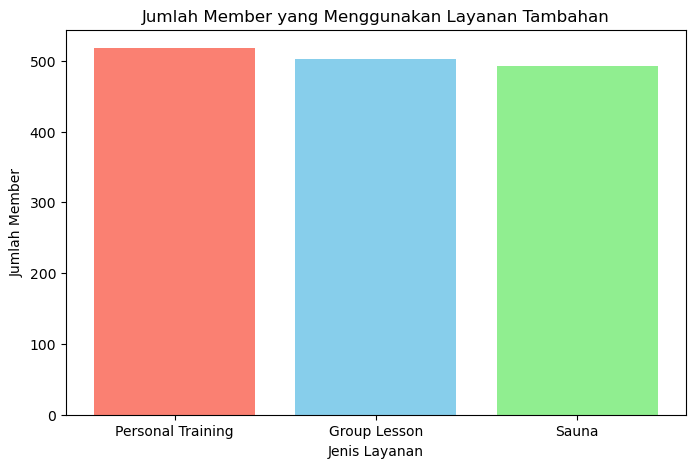

In [ ]:
services = list(service_counts.keys())
counts = list(service_counts.values())

plt.figure(figsize=(8,5))
plt.bar(services, counts, color=['salmon','skyblue','lightgreen'])
plt.title('Jumlah Member yang Menggunakan Layanan Tambahan')
plt.ylabel('Jumlah Member')
plt.xlabel('Jenis Layanan')
plt.show()


Berdasarkan hasil visualisasi, terlihat bahwa Personal Training menjadi layanan tambahan yang paling banyak digunakan oleh member.
Hal ini menunjukkan bahwa banyak member memilih pendampingan dari pelatih pribadi untuk mencapai target kebugaran.

Layanan tambahan seperti Personal Training, Sauna, dan Group Lesson termasuk layanan premium atau opsional karena memberikan pengalaman ekstra bagi member. Meskipun semua member dapat mengaksesnya, analisis penggunaan layanan ini membantu gym mengetahui mana yang paling diminati untuk prioritas promosi atau penjadwalan fasilitas.


### Nomor 4

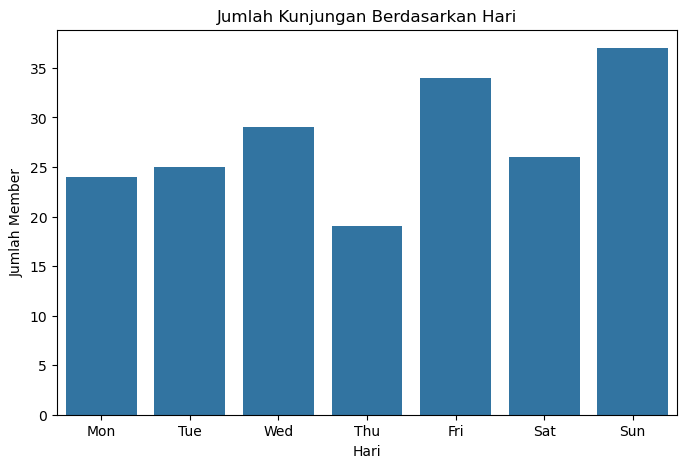

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='days_per_week', order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Jumlah Kunjungan Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Member')
plt.show()

In [ ]:
# Untuk mengambil waktunya
df['check_in_hour'] = pd.to_datetime(df['avg_time_check_in'], format='%H:%M:%S').dt.hour


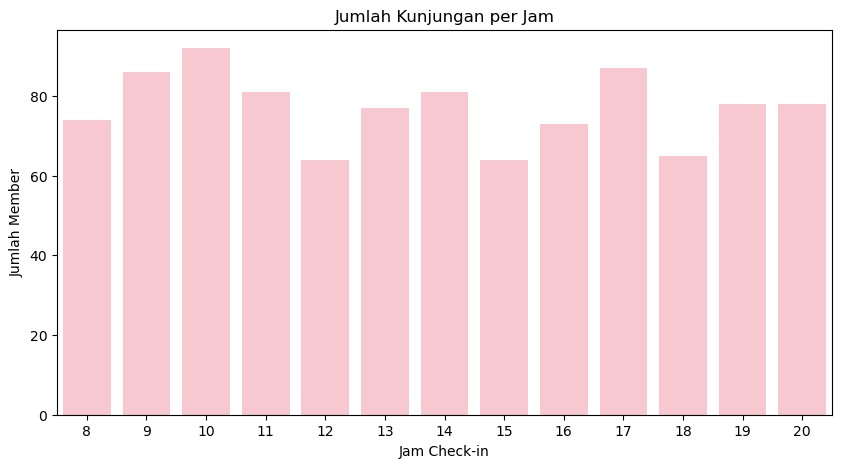

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='check_in_hour', data=df, color='pink')
plt.title('Jumlah Kunjungan per Jam')
plt.xlabel('Jam Check-in')
plt.ylabel('Jumlah Member')
plt.xticks(rotation=0)
plt.show()


**Pola yang Terlihat:**
Pola ini menunjukkan member lebih sering datang di akhir pekan dan hari tengah minggu tertentu, mungkin karena jadwal kerja atau kebiasaan olahraga. 

Puncak kunjungan terjadi pada pukul 10 pagi, kemungkinan karena banyak member yang datang sebelum makan siang atau saat istirahat kerja.
Jam sore (16–19) juga cukup ramai, ini umum karena banyak orang datang setelah pulang kerja atau kuliah.
Aktivitas gym menurun setelah jam 19, menunjukkan mayoritas member berolahraga di siang–sore hari.

### Nomor 5

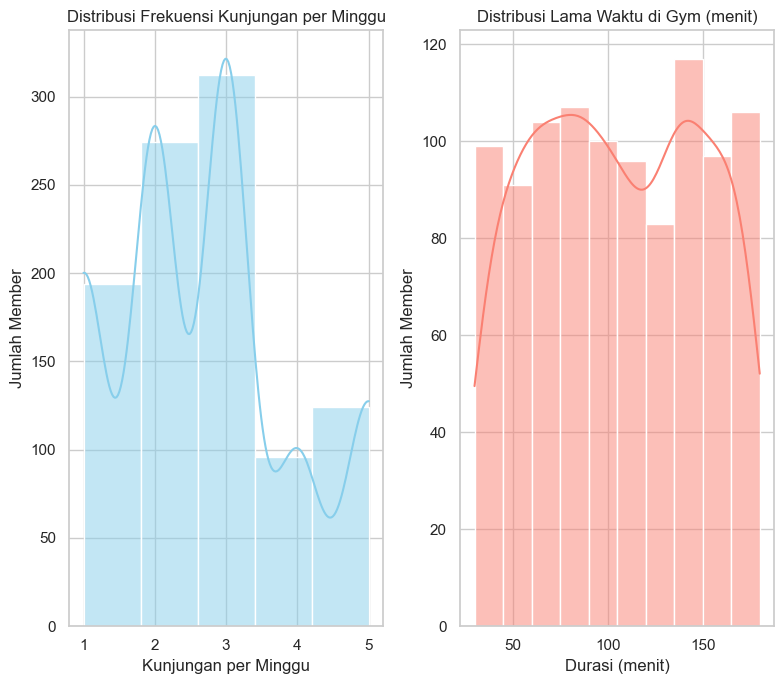

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,7))

# Histogram Frekuensi Kunjungan
plt.subplot(1,2,1)
sns.histplot(df['visit_per_week'], bins=5, kde=True, color='skyblue')
plt.title('Distribusi Frekuensi Kunjungan per Minggu')
plt.xlabel('Kunjungan per Minggu')
plt.ylabel('Jumlah Member')

# Histogram Lama Waktu di Gym
plt.subplot(1,2,2)
sns.histplot(df['avg_time_in_gym'], bins=10, kde=True, color='salmon')
plt.title('Distribusi Lama Waktu di Gym (menit)')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah Member')

plt.tight_layout()
plt.show()


In [ ]:
# Statistik deskriptif untuk kolom visit_per_week dan avg_time
deskripsi = df[['visit_per_week', 'avg_time_in_gym']].describe()

# Menampilkan hasil
print(deskripsi)


       visit_per_week  avg_time_in_gym
count     1000.000000      1000.000000
mean         2.682000       105.260000
std          1.241941        43.557177
min          1.000000        30.000000
25%          2.000000        67.000000
50%          3.000000       104.000000
75%          3.000000       143.000000
max          5.000000       180.000000


Mayoritas member datang 2–3 kali per minggu dan menghabiskan sekitar 1,5–2 jam per kunjungan.
Ada anggota dengan kebiasaan ekstrem: jarang datang tapi lama di gym, atau sering datang tapi durasinya pendek.
Informasi ini bisa berguna untuk penjadwalan kelas, fasilitas, dan personal training

### Nomor 6

<Figure size 1000x600 with 0 Axes>

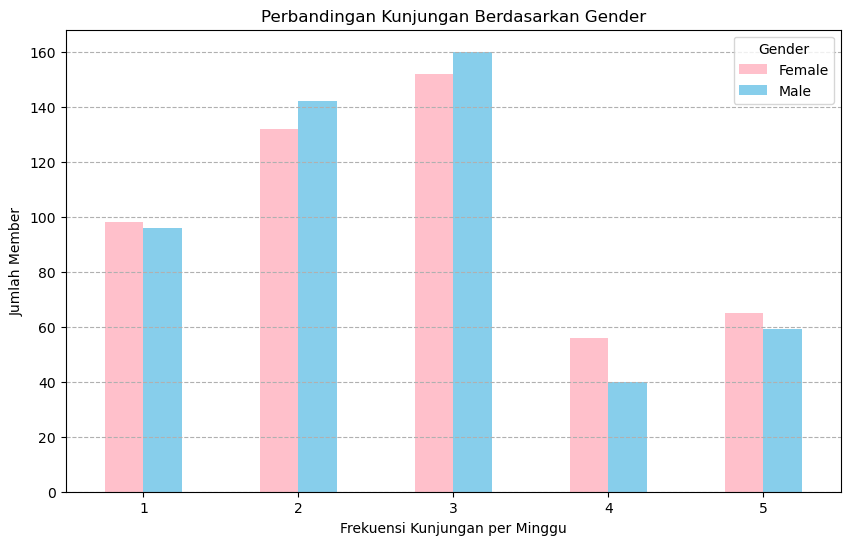

In [ ]:
# 1. Hitung Frekuensi Silang (Cross-tabulation)
visit_gender_counts = df.groupby(['gender', 'visit_per_week']).size().unstack(fill_value=0)

# 2. Visualisasi Grouped Bar Chart
plt.figure(figsize=(10, 6))

# Membuat diagram batang berkelompok dari tabel frekuensi
visit_gender_counts.T.plot(
    kind='bar',
    figsize=(10, 6),
    color=['pink', 'skyblue'] # Sesuaikan warna
)

plt.title('Perbandingan Kunjungan Berdasarkan Gender')
plt.xlabel('Frekuensi Kunjungan per Minggu')
plt.ylabel('Jumlah Member')
plt.xticks(rotation=0) # Memastikan label X tegak lurus
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--')
plt.show()

Pria cenderung memiliki frekuensi kunjungan lebih tinggi pada 3 dan 5 kali per minggu

## Kesimpulan

Berdasarkan analisis data 1.000 member gym, layanan seperti Personal Training, Group Lesson, dan Sauna cukup diminati oleh semua member. Hasil uji statistik menunjukkan bahwa tipe abonemen (Standard vs Premium) tidak berpengaruh signifikan terhadap frekuensi kunjungan maupun penggunaan fasilitas. Artinya, semua member memiliki akses yang sama, dan status "Premium" bisa saya simpulkan bahwa premium disini mungkin menekankan pada kenyamanan atau keuntungan tambahan, seperti parkir tersendiri atau waktu menggunakan layanan tambahan yg lebih lama dibanding "Standar". Saya mengatakan "Mungkin" karna memang datanya kurang lengkap untuk membedakan Premium dan Standar.

Pola kunjungan menunjukkan jam ramai di pagi dan sore hari, serta hari puncak pada Minggu, Jumat, dan Rabu. Selain itu, cowok dan cewek memiliki kebiasaan workout yang mirip, dan juga terlihat bahwa dari frekuensi kunjungan anatr gender tidak terlalu juah berdeda.

Secara keseluruhan, gym telah berhasil menyediakan layanan yang merata bagi semua tipe member, namun masih ada peluang untuk meningkatkan nilai tambah bagi pelanggan Premium agar terasa lebih berbeda.

**Rekomendasi:**
1. Sesuaikan jadwal fasilitas dan kelas dengan jam serta hari favorit member untuk meningkatkan partisipasi.

2. Promosikan layanan tambahan (Personal Training, Group Lesson, Sauna) secara merata agar semua member tertarik menggunakannya.

3. Fokus pada peningkatan kualitas pengalaman melalui layanan seperti Personal Training dan Sauna, bukan hanya mendorong frekuensi kunjungan.

4. Manfaatkan data kunjungan untuk mengoptimalkan kapasitas fasilitas, jadwal instruktur, dan event khusus agar pengalaman member lebih nyaman dan efisien

5. Terapkan program insentif sederhana untuk anggota dengan frekuensi kunjungan di bawah rata-rata (misalnya, "Datang 2x lagi minggu ini, dapatkan minuman berenergi gratis").